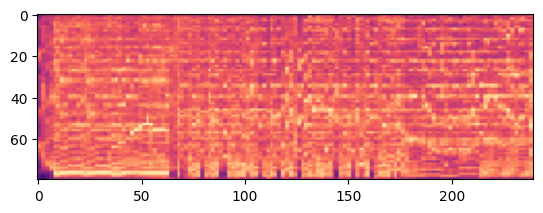

(80, 240, 4)

In [29]:
import matplotlib.pyplot as plt
from matplotlib.image import imread,imsave
from tensorflow.keras.preprocessing.image import img_to_array
img = imread("../music/ARASHI/image_data/ARASHI - ｢未完｣ [Official Music Video]_01.png")
plt.imshow(img,)
plt.show()
array = img_to_array(img)
array.shape

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import utils
utils.set_random_seed(0)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(rescale=1/255,validation_split=0.25)
datagen = ImageDataGenerator(rescale=1/255,validation_split=0.25,
        featurewise_center=False, # データセット全体で，入力の平均を0にする
        samplewise_center=False,  # 各サンプルの平均を0にする
        rotation_range=0,  # 整数．画像をランダムに回転する回転範囲．
        zoom_range = 0, # 浮動小数点数または[lower，upper]．ランダムにズームする範囲．
        # 浮動小数点数が与えられた場合，[lower, upper] = [1-zoom_range, 1+zoom_range]
        width_shift_range=0.1,  # r浮動小数点数（横幅に対する割合）．ランダムに水平シフトする範囲
        height_shift_range=0,  # 浮動小数点数（縦幅に対する割合）．ランダムに垂直シフトする範囲
        horizontal_flip=False,  # 水平方向に入力をランダムに反転
        vertical_flip=False # 垂直方向に入力をランダムに反転)
)
train_generator = datagen.flow(x_train)

# train_generator = datagen.flow_from_directory(
#         'train',
#         subset='training',
#         target_size=(80, 240),
#         batch_size=16,
#         class_mode='categorical'
#         )

# val_generator = datagen.flow_from_directory(
#         'train',
#         subset='validation',
#         target_size=(80, 240),
#         batch_size=16,
#         class_mode='categorical'
#         )

# test_generator = datagen.flow_from_directory(
#         'test',
#         target_size=(80, 240),
#         batch_size=16,
#         class_mode='categorical'
#         )

Found 480 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Found 216 images belonging to 8 classes.


In [81]:
train_generator.class_indices

{'ARASHI': 0,
 'MRCHILDREN': 1,
 'NAGABUCHI': 2,
 'SOUTHEN': 3,
 'SPITZ': 4,
 'TANIMURA': 5,
 'YONE': 6,
 'YUZU': 7}

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
# モデル定義
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(80, 240, 3)))
model.add(MaxPooling2D(pool_size=(5, 3)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 76, 236, 32)       2432      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 15, 78, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 74, 32)        25632     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 2, 24, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 1536)              0         
                                                                 
 dropout_11 (Dropout)        (None, 1536)            

In [83]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [84]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)

Epoch 1/30
4/4 [==============================] - 5s 732ms/step - loss: 2.0800 - accuracy: 0.1312 - val_loss: 2.0744 - val_accuracy: 0.1562
Epoch 2/30
4/4 [==============================] - 2s 453ms/step - loss: 2.0837 - accuracy: 0.1604 - val_loss: 2.0769 - val_accuracy: 0.1250
Epoch 3/30
4/4 [==============================] - 2s 445ms/step - loss: 2.0753 - accuracy: 0.1354 - val_loss: 2.0765 - val_accuracy: 0.1375
Epoch 4/30
4/4 [==============================] - 2s 437ms/step - loss: 2.0716 - accuracy: 0.1437 - val_loss: 2.0615 - val_accuracy: 0.1813
Epoch 5/30
4/4 [==============================] - 2s 425ms/step - loss: 2.0584 - accuracy: 0.1688 - val_loss: 2.0512 - val_accuracy: 0.1562
Epoch 6/30
4/4 [==============================] - 2s 461ms/step - loss: 2.0266 - accuracy: 0.1979 - val_loss: 2.0338 - val_accuracy: 0.1750
Epoch 7/30
4/4 [==============================] - 2s 428ms/step - loss: 1.9956 - accuracy: 0.2188 - val_loss: 1.9952 - val_accuracy: 0.2062
Epoch 8/30
4/4 [====

In [85]:
import pandas as pd
result = pd.DataFrame(history.history)

<Axes: >

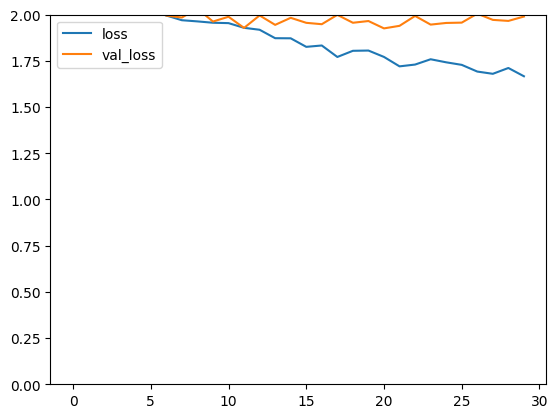

In [86]:
result[['loss','val_loss']].plot(ylim=[0, 2])

<Axes: >

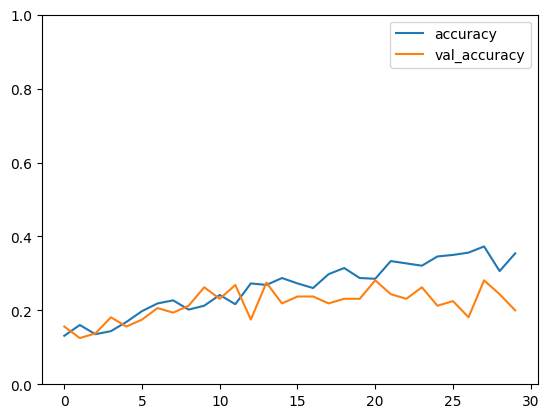

In [87]:
result[['accuracy', 'val_accuracy']].plot(ylim=[0, 1])

In [88]:
model.evaluate(test_generator)

2/2 [==============================] - 1s 613ms/step - loss: 1.9324 - accuracy: 0.2824


[1.9323668479919434, 0.28240740299224854]

ここから先は、付随して試行したこと。
generator を使ったものの、実データを見たかった。

In [89]:
y_pred = model.predict(test_generator)

2/2 [==============================] - 1s 208ms/step


In [90]:
y_pred.shape

(216, 8)

In [91]:
y_pred_i = np.argmax(y_pred,axis=1)

In [92]:
y_pred_i

array([6, 0, 4, 0, 1, 1, 6, 0, 0, 0, 0, 1, 0, 5, 5, 2, 0, 4, 0, 7, 0, 0,
       2, 0, 4, 4, 4, 0, 0, 4, 1, 1, 2, 0, 4, 2, 0, 4, 0, 4, 1, 0, 0, 5,
       0, 3, 7, 5, 5, 4, 4, 0, 3, 2, 0, 5, 2, 2, 0, 0, 0, 1, 0, 0, 5, 4,
       0, 2, 3, 4, 0, 0, 5, 4, 0, 1, 2, 7, 2, 0, 0, 0, 1, 1, 0, 2, 5, 4,
       5, 4, 4, 5, 5, 4, 0, 5, 0, 2, 5, 0, 4, 1, 0, 2, 0, 2, 3, 4, 4, 1,
       0, 0, 0, 0, 0, 7, 5, 4, 5, 2, 2, 0, 4, 2, 0, 4, 4, 5, 4, 4, 4, 0,
       4, 3, 1, 5, 0, 5, 2, 4, 0, 0, 4, 4, 0, 5, 0, 2, 5, 0, 0, 2, 2, 5,
       4, 4, 4, 4, 0, 5, 4, 2, 5, 1, 7, 2, 5, 0, 4, 2, 4, 5, 0, 0, 0, 2,
       2, 4, 0, 6, 0, 2, 4, 0, 0, 0, 1, 4, 3, 0, 4, 1, 0, 0, 5, 5, 2, 2,
       5, 0, 1, 3, 0, 2, 0, 1, 0, 5, 4, 0, 0, 4, 4, 4, 0, 1])

↑　y_predは

↓　test_generatorで作成されたデータのラベルを確認

In [93]:
y_test_label = test_generator.classes

In [94]:
y_test_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int32)

In [16]:
print(y_pred_i.shape)
print(y_test_label.shape)

(216,)
(216,)


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label,y_pred_i))

              precision    recall  f1-score   support

           0       0.12      0.11      0.12        27
           1       0.00      0.00      0.00        27
           2       0.12      0.11      0.11        27
           3       0.15      0.19      0.17        27
           4       0.32      0.33      0.33        27
           5       0.06      0.11      0.08        27
           6       0.23      0.19      0.20        27
           7       0.10      0.07      0.08        27

    accuracy                           0.14       216
   macro avg       0.14      0.14      0.14       216
weighted avg       0.14      0.14      0.14       216

